In [1]:
!nvidia-smi

Sun Oct 15 00:51:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 5016.7/8062.4 GB disk)


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NJpzXwEKxX8jfOlAtF68")
project = rf.workspace("wei-guo").project("gwhd2021")
dataset = project.version(3).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:
      Successfully uninstalled opencv-python-headless-4.8.0.76
  Attempting uninstall: idna
    Found

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.198, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to GWHD2021-3 in yolov8:: 100%|██████████| 13040/13040 [00:04<00:00, 3017.72it/s]


In [5]:
import yaml

# Define the path to your data.yaml file
data_yaml_path = '/kaggle/working/GWHD2021-3/data.yaml'  # Replace with the actual path

# Read and parse the data.yaml file
with open(data_yaml_path, 'r') as file:
    data = yaml.load(file, Loader=yaml.FullLoader)

# Modify the paths in the 'data' dictionary
data['test'] = '/kaggle/working/GWHD2021-3/test'
data['train'] = '/kaggle/working/GWHD2021-3/train'
data['val'] = '/kaggle/working/GWHD2021-3/valid'

# Write the modified data back to the data.yaml file
with open(data_yaml_path, 'w') as file:
    yaml.dump(data, file)

# Print the updated data.yaml
print(data)


{'names': ['whd'], 'nc': 1, 'roboflow': {'license': 'MIT', 'project': 'gwhd2021', 'url': 'https://universe.roboflow.com/wei-guo/gwhd2021/dataset/3', 'version': 3, 'workspace': 'wei-guo'}, 'test': '/kaggle/working/GWHD2021-3/test', 'train': '/kaggle/working/GWHD2021-3/train', 'val': '/kaggle/working/GWHD2021-3/valid'}


In [6]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 batch=8 plots=True

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 80.4MB/s]
Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/GWHD2021-3/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False,

In [ ]:
!yolo task=detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

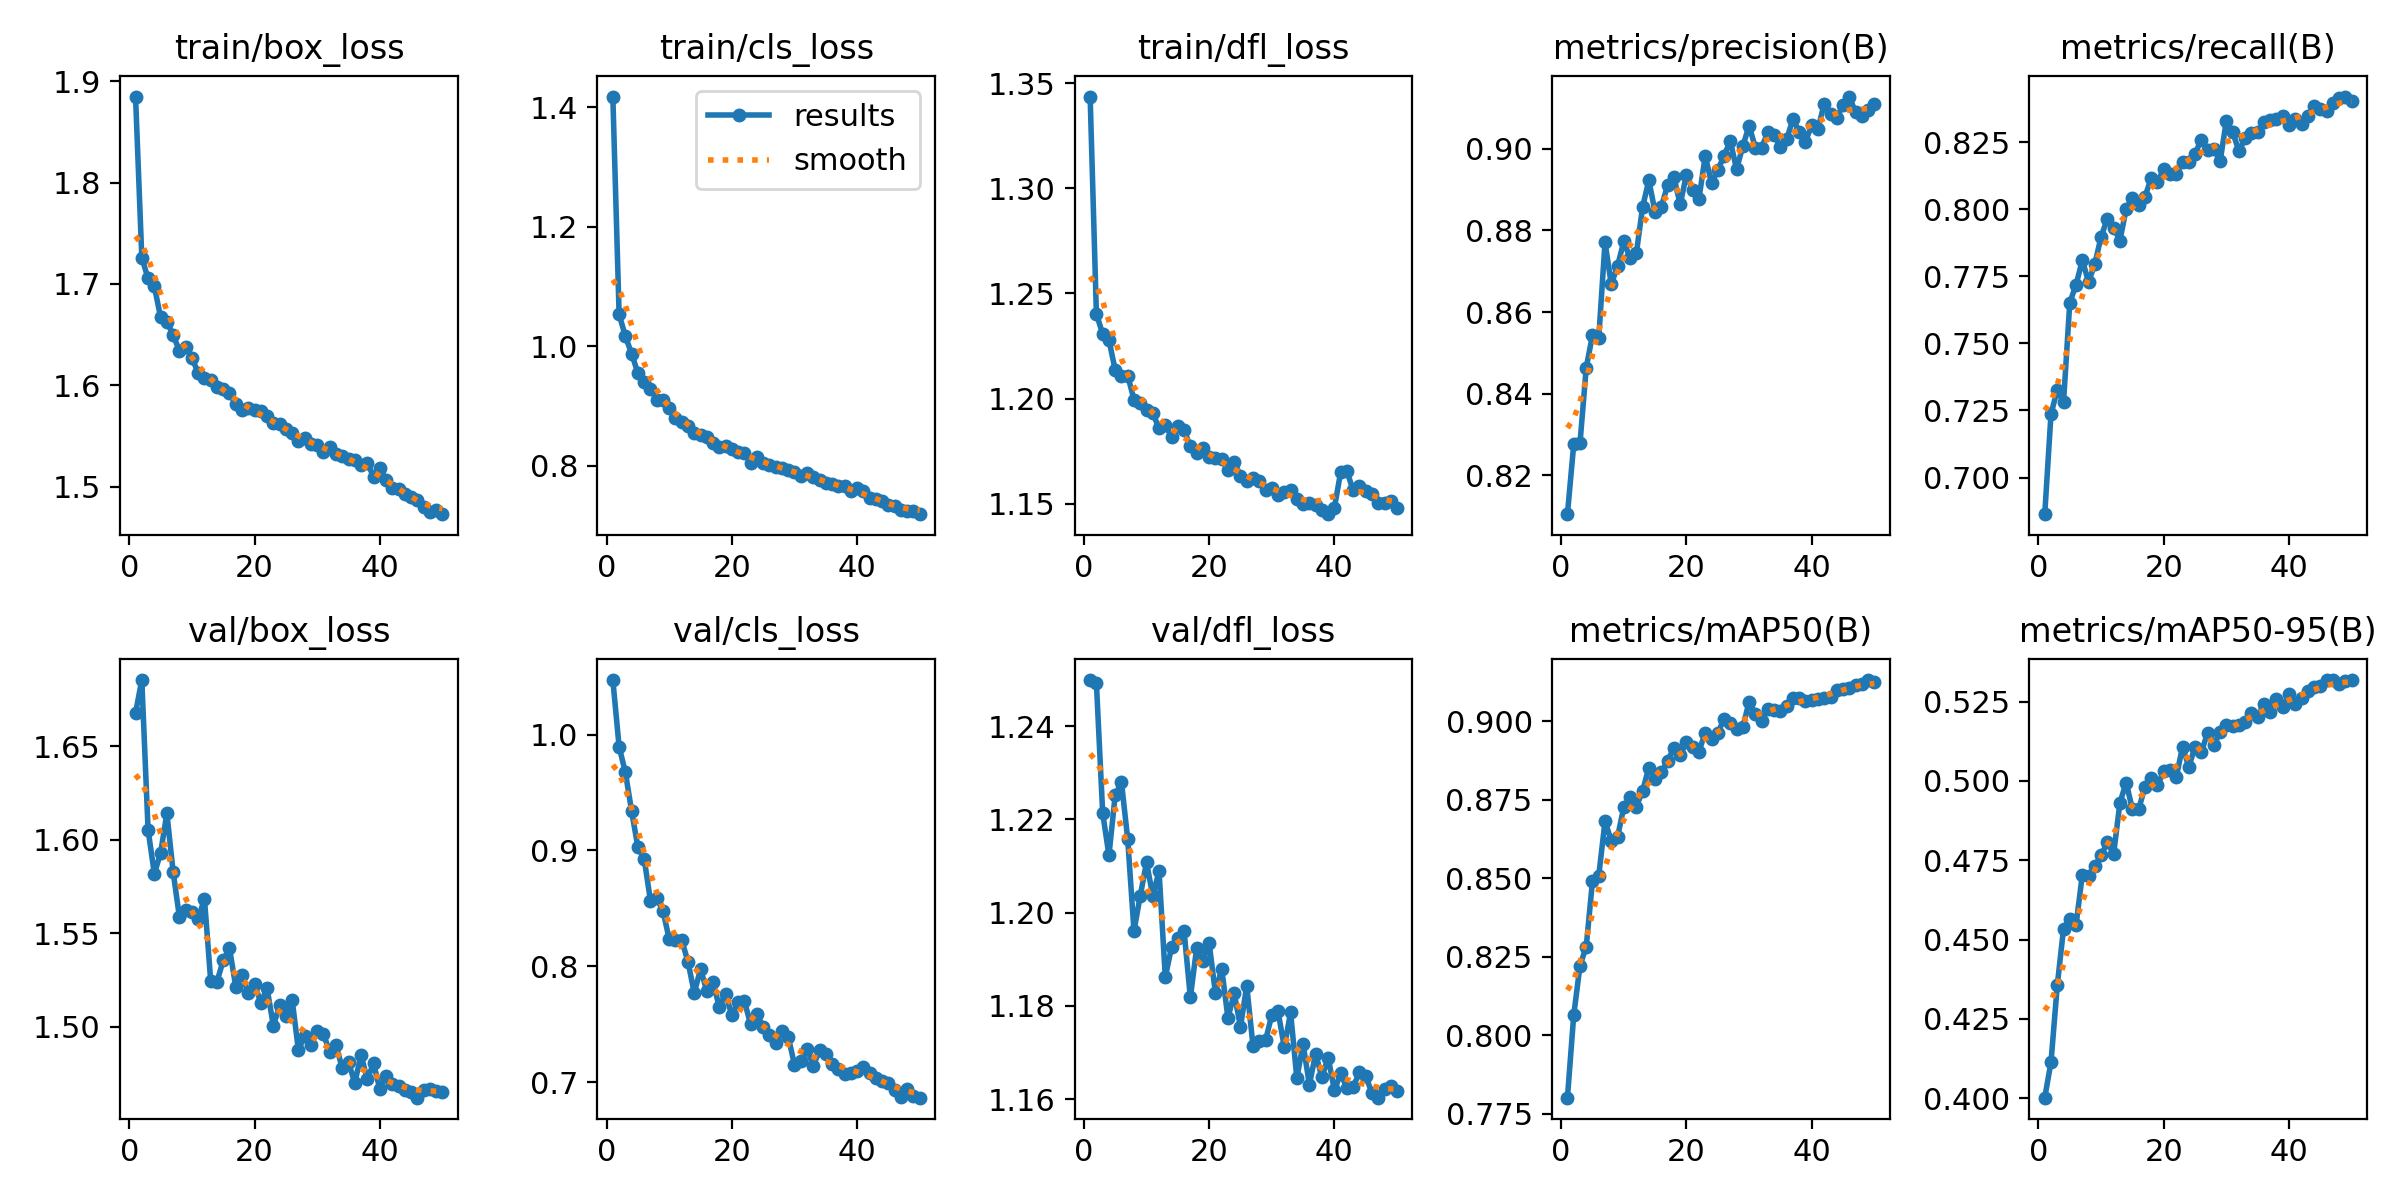

In [8]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/651 /kaggle/working/GWHD2021-3/test/images/00319488e879a811698174d9f26ef174f2f108a13e12edee5a3c50899ed26336_png_jpg.rf.5dd1919491ca2d86b48b44e1207b76d4.jpg: 640x640 13 whds, 17.9ms
image 2/651 /kaggle/working/GWHD2021-3/test/images/00b984a8a9c1e7a275f53bc98f32b5ce980fe7b8acb484813487d081c1a76f19_png_jpg.rf.875ba1204d4c7d339a3b309aa8498cfb.jpg: 640x640 74 whds, 8.4ms
image 3/651 /kaggle/working/GWHD2021-3/test/images/0272ca52999fc76c654ce98cbdffa03a432944c157b725cbd2f867b13d12408a_png_jpg.rf.a634a755970bcabf15803ef185d7f4bf.jpg: 640x640 52 whds, 7.9ms
image 4/651 /kaggle/working/GWHD2021-3/test/images/028a80f836cb89be432bdb3de9f7cf821977a72e5fa87ffc297332a7109a389a_png_jpg.rf.3b5b22eed8f93c7bec9cdb18a2ea54a6.jpg: 640x640 57 whds, 8.4ms
image 5/651 /kaggle/working/GWHD2021-3/test/images/02984f94a65912641b63e9a85b23b04a6a

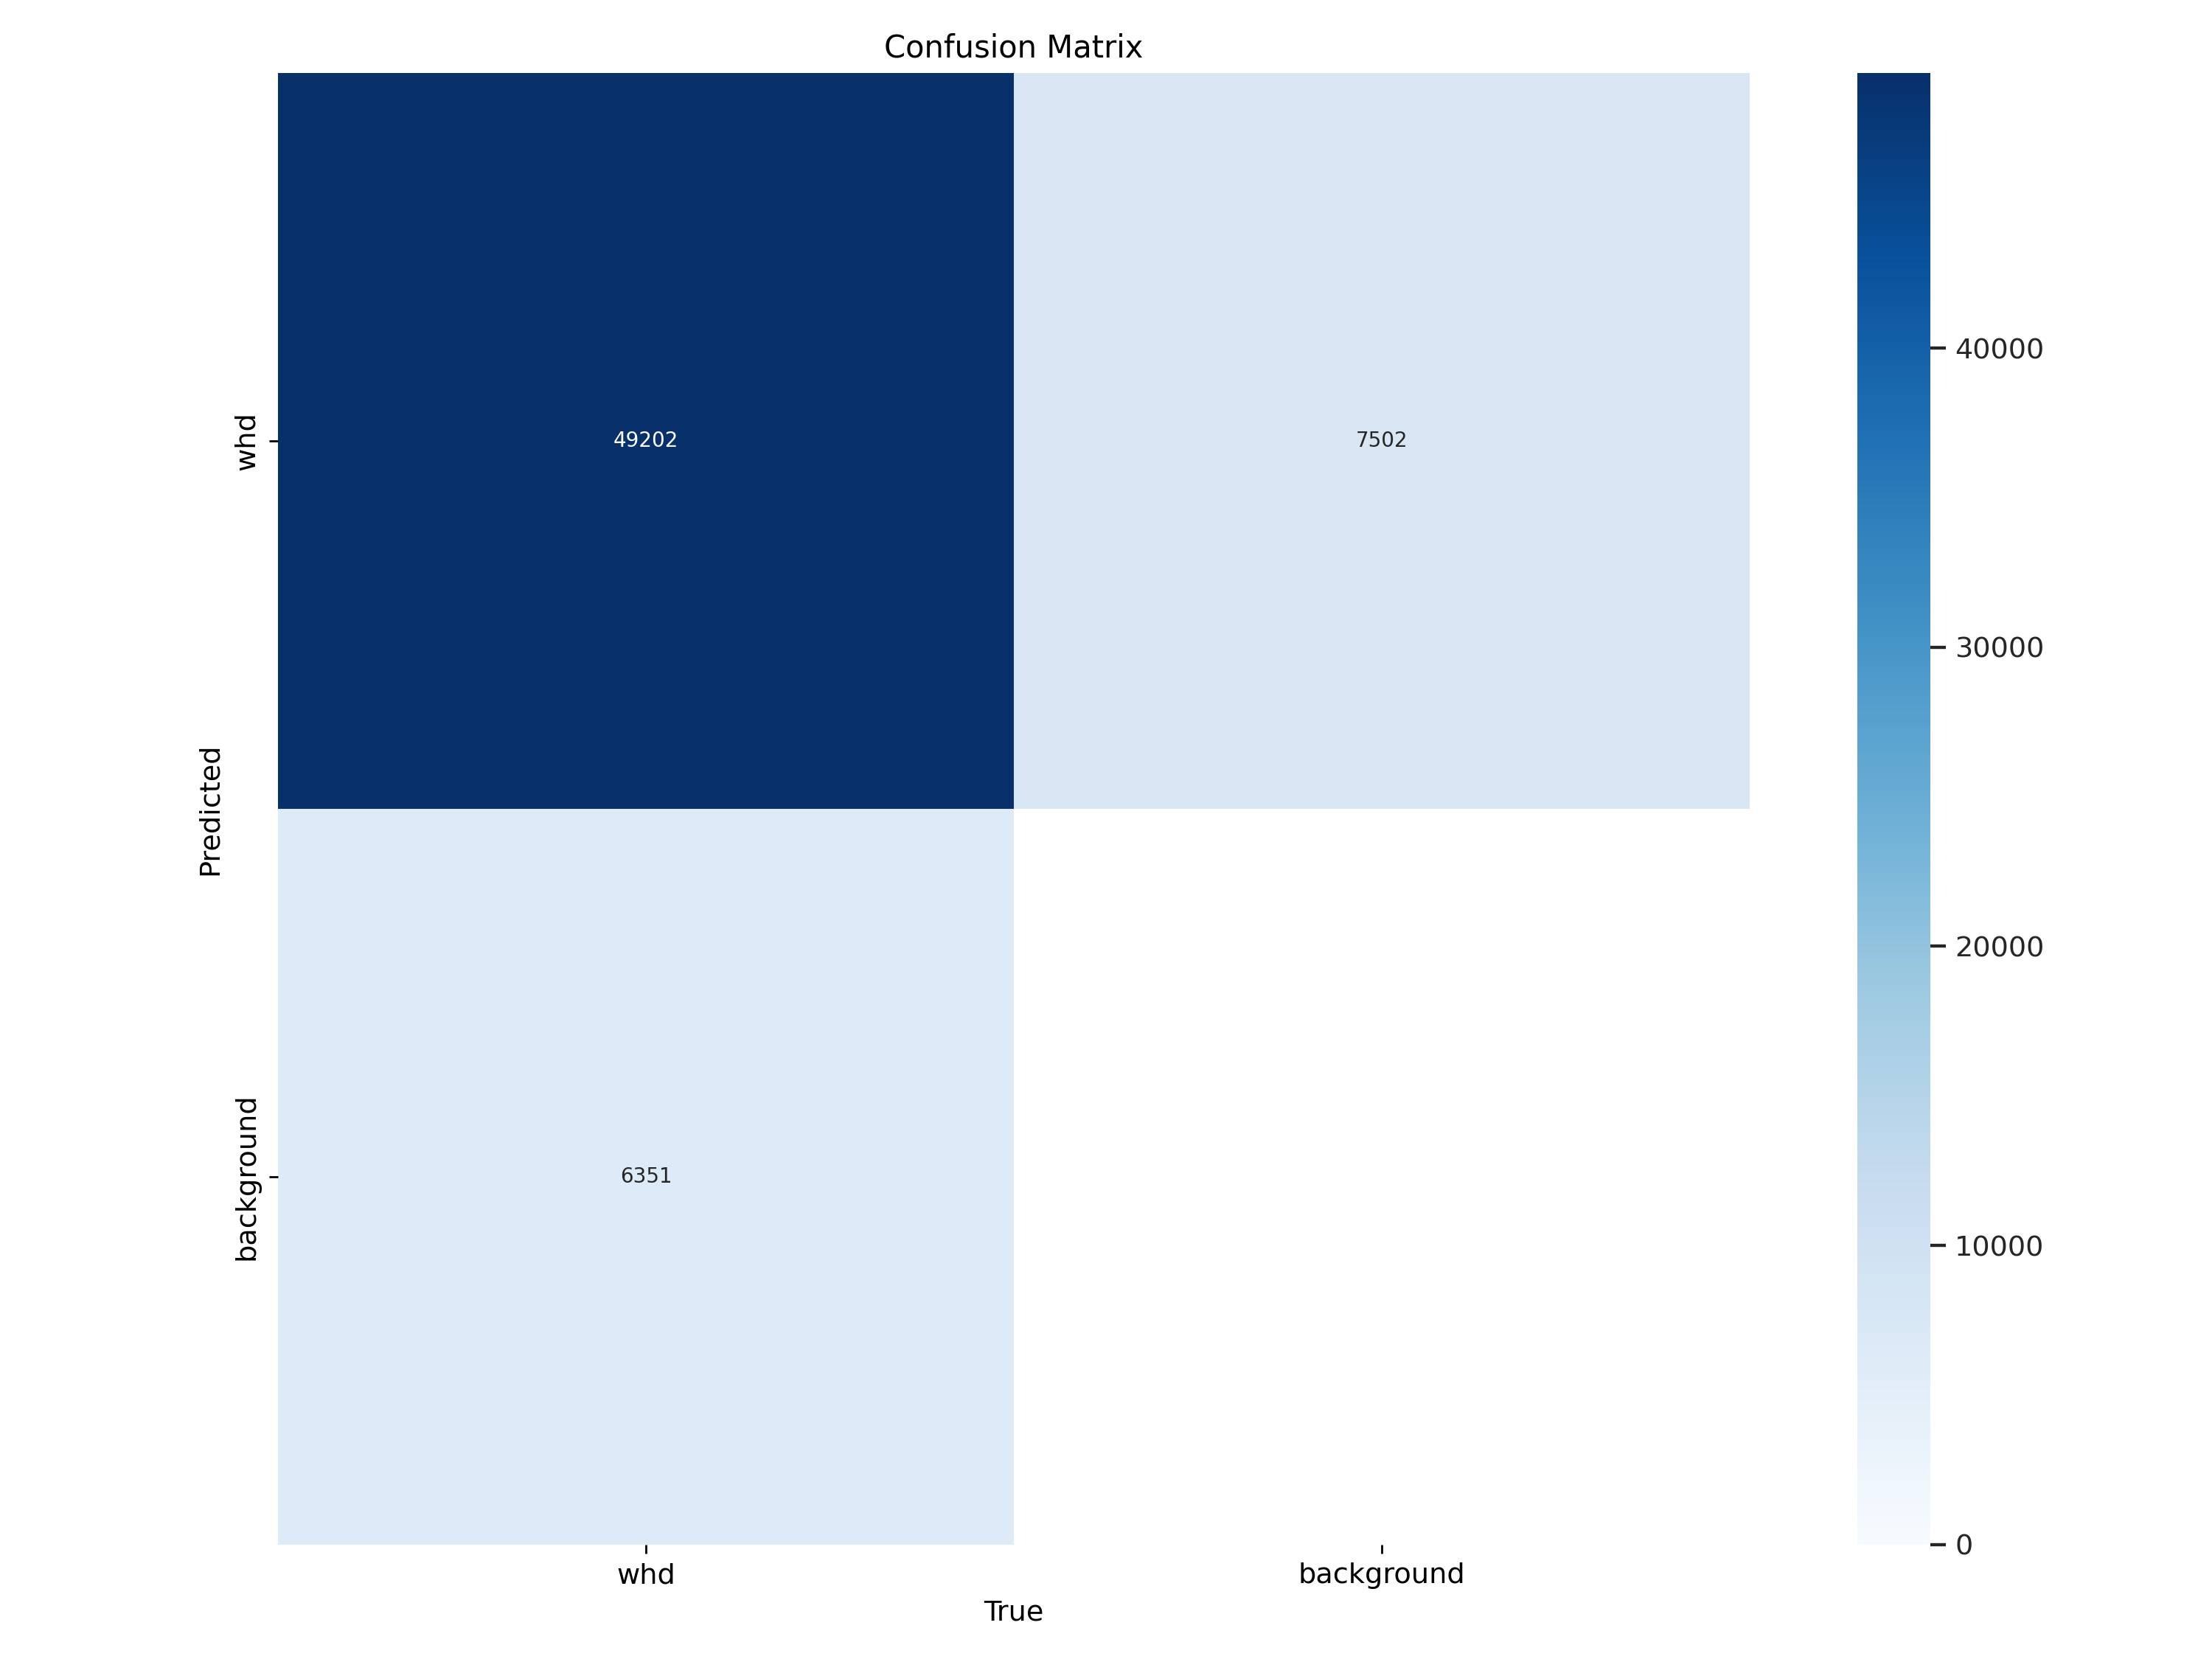

In [10]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

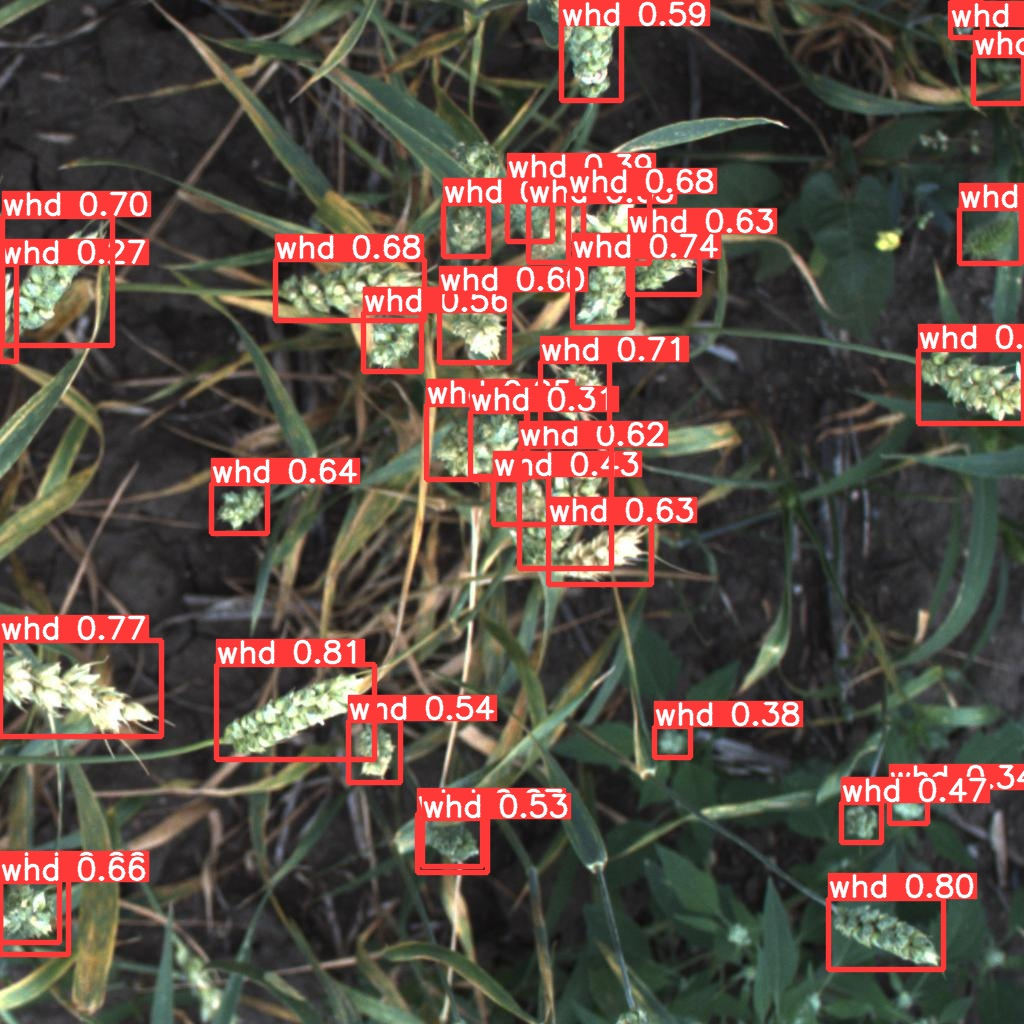

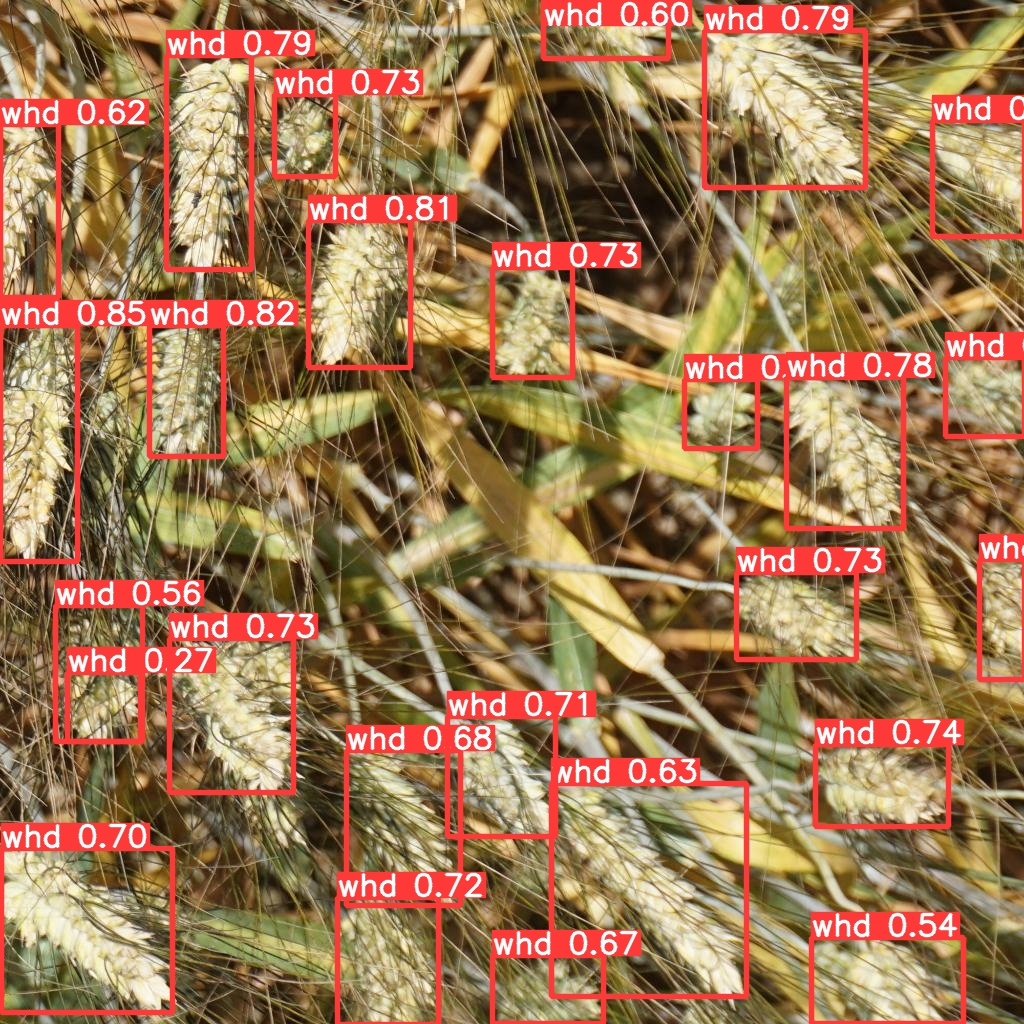

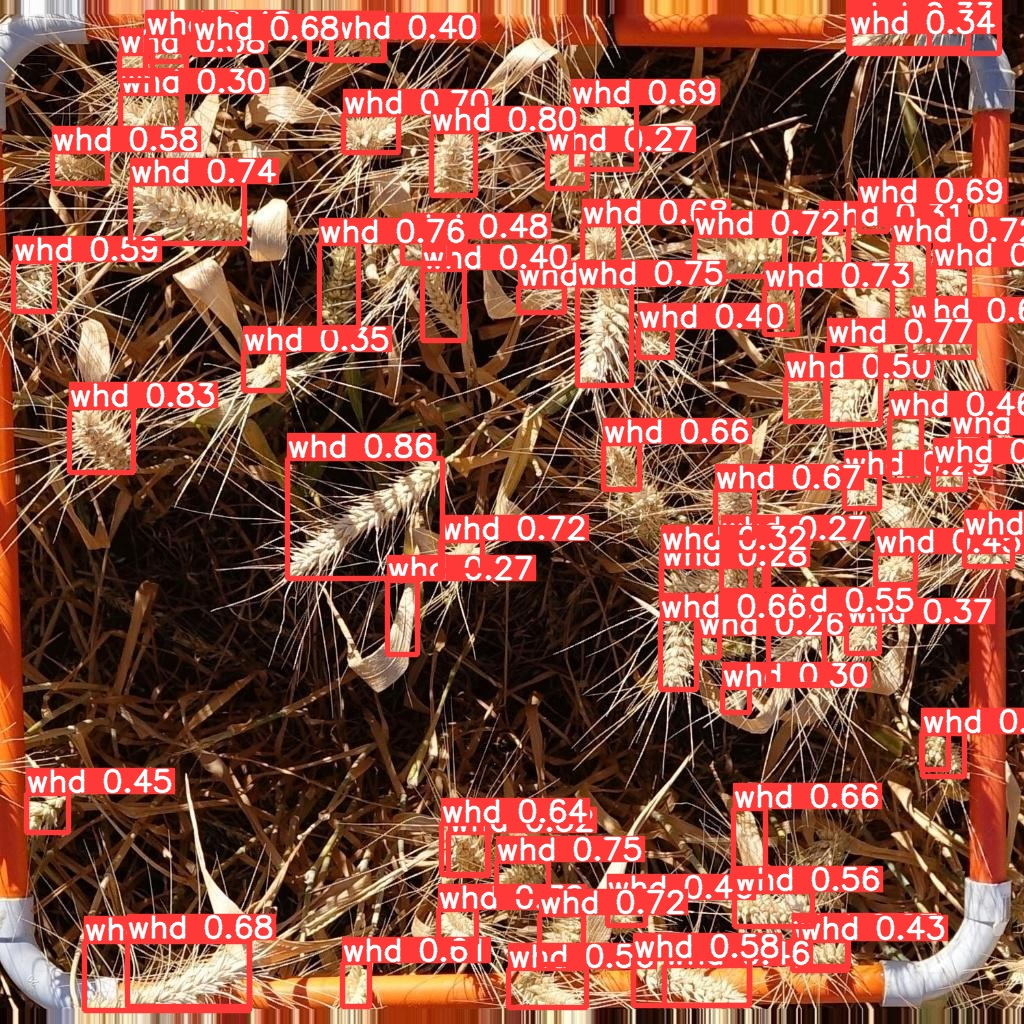

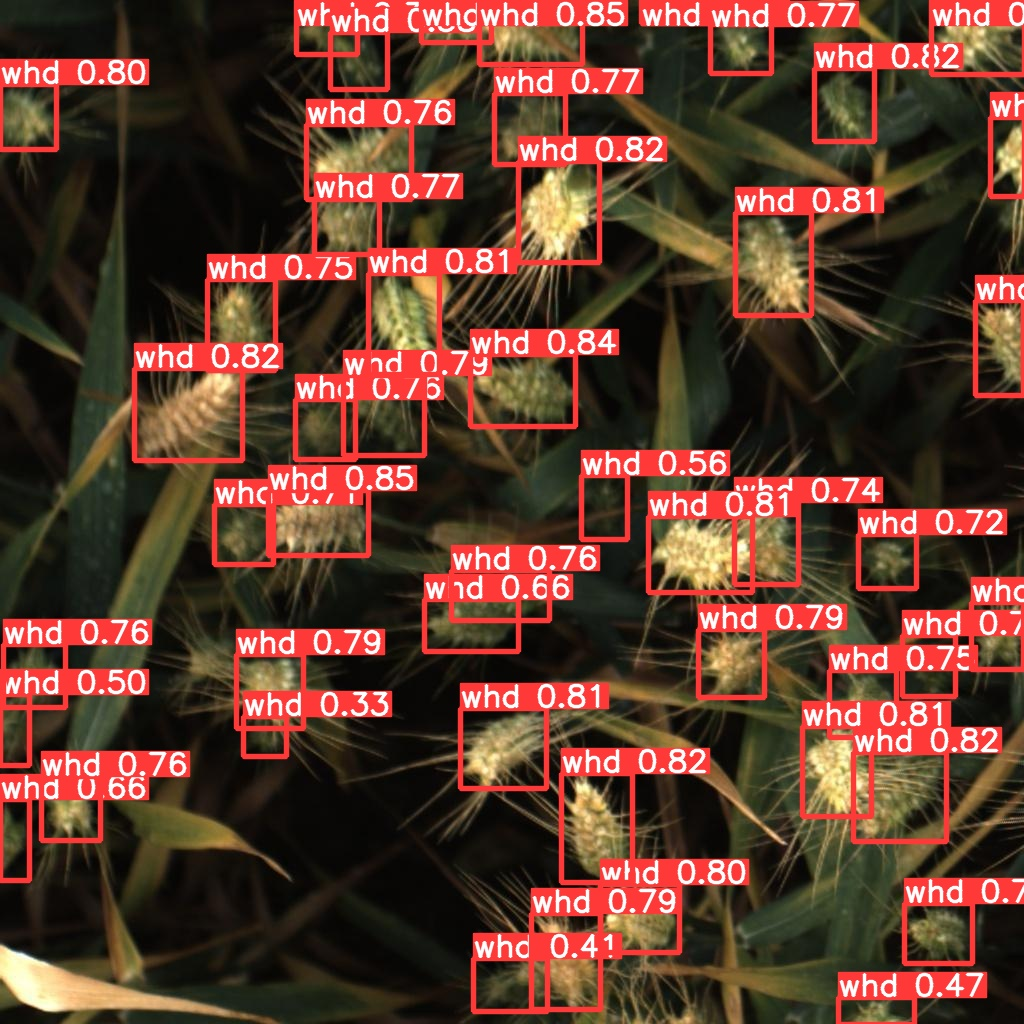

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")